<a href="https://colab.research.google.com/github/sutanto5/DataScience-Exploration/blob/main/Amazon_Sentiment_Analysis_Pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Ratings Comparison


In [ ]:
# prompt: import all the csvs except anxious recent

import glob

def import_csv_files(exclude_files):
    all_files = glob.glob("*.csv")
    included_files = [file for file in all_files if file not in exclude_files]
    dataframes = {}
    for file in included_files:
      try:
        dataframes[file] = pd.read_csv(file)
        print(f"Successfully imported {file}")
      except Exception as e:
        print(f"Error importing {file}: {e}")
    return dataframes

# Example usage:
exclude_these = ["anxious_recent.csv"]  # Add more file names here
imported_data = import_csv_files(exclude_these)

# Access individual DataFrames
# for filename, df in imported_data.items():
#     print(f"\nDataFrame for {filename}:\n{df.head()}")


Successfully imported HouseHardcover.csv
Successfully imported MelaniaPrice.csv
Successfully imported House2Star.csv
Successfully imported AnxiousRecent.csv
Successfully imported House5Star.csv
Successfully imported Body1Star.csv
Successfully imported House4Star.csv
Successfully imported MelaniaKindle.csv
Successfully imported MelaniaRecent.csv
Successfully imported HillbillyPrice.csv
Successfully imported Hillbilly5Stars.csv
Successfully imported HillbillyKindle.csv
Successfully imported BodyDigital.csv
Successfully imported Tyranny1Star.csv
Successfully imported AnxiousHardcover.csv
Successfully imported MelaniaFourStars.csv
Successfully imported HouseKindle.csv
Successfully imported House3Star.csv
Successfully imported Anxious2Star.csv
Successfully imported BodyPaper.csv
Successfully imported Tyranny3Star.csv
Successfully imported HiillbillyEbook.csv
Successfully imported HousePaperback.csv
Successfully imported BodyPaperback.csv
Successfully imported HillbillyPaperback.csv
Successf

In [ ]:
# prompt: import all the book csvs, each title is realted to the keyword (i.e. hardcover) combine datasets with the same keyword

import pandas as pd
import glob

def combine_datasets_by_keyword(keyword):
  all_files = glob.glob("*.csv")
  combined_df = pd.DataFrame()
  for file in all_files:
    if keyword in file.lower():
      try:
        df = pd.read_csv(file)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        print(f"Successfully combined {file}")
      except Exception as e:
        print(f"Error combining {file}: {e}")
  return combined_df

# Example usage:
hardcover_df = combine_datasets_by_keyword("hardcover")
kindle_df = combine_datasets_by_keyword("kindle")
paperback_df = combine_datasets_by_keyword("paperback")
ebook_df = combine_datasets_by_keyword("ebook")
digital_df = combine_datasets_by_keyword("digital")
price_df = combine_datasets_by_keyword("price")


# Display the combined DataFrames
if not hardcover_df.empty:
  print("\nCombined DataFrame for 'hardcover':")
  print(hardcover_df.head())
else:
  print("\nNo files found with 'hardcover' in their names.")


Successfully combined HouseHardcover.csv
Successfully combined AnxiousHardcover.csv
Successfully combined MelaniaHardcover.csv
Successfully combined BodyHardcover.csv
Successfully combined HillbillyHardcover.csv
Successfully combined MelaniaKindle.csv
Successfully combined HillbillyKindle.csv
Successfully combined HouseKindle.csv
Successfully combined TyrannyKindle.csv
Successfully combined BodyKindle.csv
Successfully combined AnxiousKindle.csv
Successfully combined HousePaperback.csv
Successfully combined BodyPaperback.csv
Successfully combined HillbillyPaperback.csv
Successfully combined TyrannyPaperback.csv
Successfully combined HiillbillyEbook.csv
Successfully combined BodyEbook.csv
Successfully combined TyrannyEbook.csv
Successfully combined BodyDigital.csv
Successfully combined TyrannyDigital.csv
Successfully combined AnxiousDigital.csv
Successfully combined MelaniaDigital.csv
Successfully combined HillbillyDigital.csv
Successfully combined MelaniaPrice.csv
Successfully combined 

In [ ]:
hardcover_df['Rating'] = hardcover_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)
paperback_df['Rating'] = paperback_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)
digital_df['Rating'] = digital_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)
kindle_df['Rating'] = kindle_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)
ebook_df['Rating'] = ebook_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)
price_df['Rating'] = price_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)

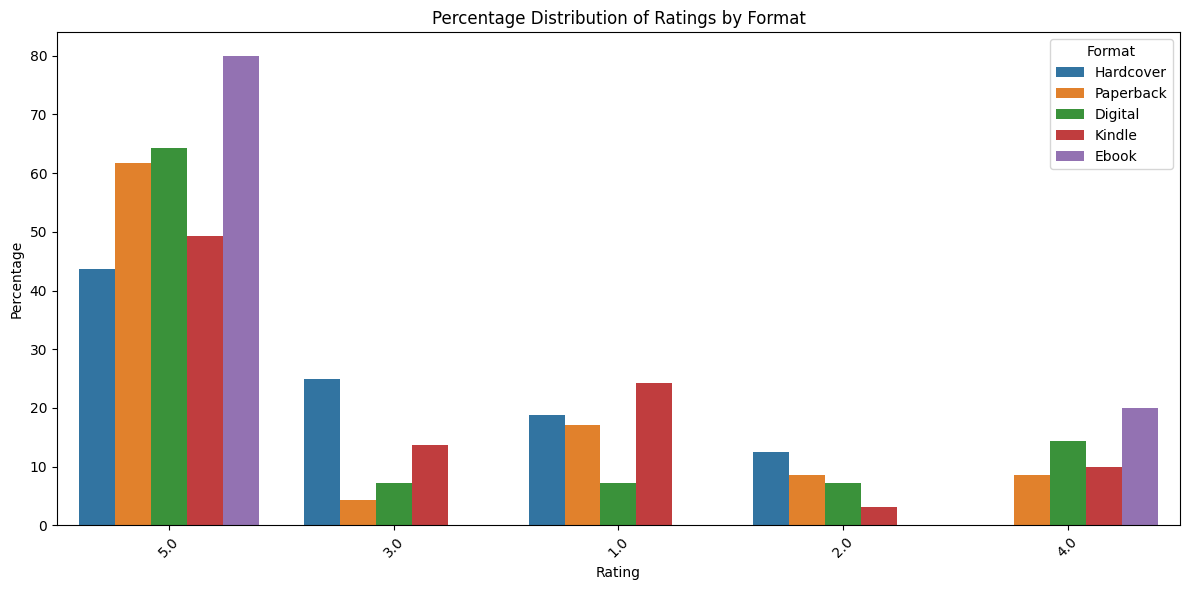

In [ ]:
import glob

# Calculate percentage distribution for each rating within each format
def calculate_rating_percentages(df, format_name):
    rating_counts = df['Rating'].value_counts(normalize=True) * 100
    rating_percentages = rating_counts.reset_index()
    rating_percentages.columns = ['Rating', 'Percentage']
    rating_percentages['Format'] = format_name
    return rating_percentages


# Create a list to store percentage dataframes for each format
percentage_dfs = []

# Calculate and append to the list for each format
percentage_dfs.append(calculate_rating_percentages(hardcover_df, 'Hardcover'))
percentage_dfs.append(calculate_rating_percentages(paperback_df, 'Paperback'))
percentage_dfs.append(calculate_rating_percentages(digital_df, 'Digital'))
percentage_dfs.append(calculate_rating_percentages(kindle_df, 'Kindle'))
percentage_dfs.append(calculate_rating_percentages(ebook_df, 'Ebook'))


# Concatenate all the percentage dataframes into one
combined_percentages = pd.concat(percentage_dfs)


# Create the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Percentage', hue='Format', data=combined_percentages)
plt.title('Percentage Distribution of Ratings by Format')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**All of them have around the same distribution of ratings, though, hardcover has a bit more of a spread than the rest**

In [ ]:
print(f"Hardcover DataFrame size: {len(hardcover_df)}")
print(f"Kindle DataFrame size: {len(kindle_df)}")
print(f"Paperback DataFrame size: {len(paperback_df)}")
print(f"Ebook DataFrame size: {len(ebook_df)}")
print(f"Digital DataFrame size: {len(digital_df)}")

#not included in the comparison above
print(f"Price DataFrame size: {len(price_df)}")

Hardcover DataFrame size: 16
Kindle DataFrame size: 132
Paperback DataFrame size: 47
Ebook DataFrame size: 5
Digital DataFrame size: 28
Price DataFrame size: 165


In [ ]:
# prompt: Generate the percentage of 5 star ratings for each

# Function to calculate the percentage of 5-star ratings for each format
def calculate_5star_percentage(df, format_name):
    """Calculates the percentage of 5-star ratings in a DataFrame.

    Args:
        df: The DataFrame containing rating information.
        format_name: The name of the format (e.g., 'Hardcover').

    Returns:
        A DataFrame with the format name and the percentage of 5-star ratings.
    """
    try:
        total_ratings = len(df)
        five_star_ratings = len(df[df['Rating'] == '5.0'])
        percentage = (five_star_ratings / total_ratings) * 100 if total_ratings > 0 else 0
        return pd.DataFrame({'Format': [format_name], '5-Star Percentage': [percentage]})
    except Exception as e:
        print(f"Error calculating 5-star percentage for {format_name}: {e}")
        return pd.DataFrame({'Format': [format_name], '5-Star Percentage': [0]})


# Calculate and store 5-star percentages for each format
five_star_percentages = []
five_star_percentages.append(calculate_5star_percentage(hardcover_df, 'Hardcover'))
five_star_percentages.append(calculate_5star_percentage(paperback_df, 'Paperback'))
five_star_percentages.append(calculate_5star_percentage(digital_df, 'Digital'))
five_star_percentages.append(calculate_5star_percentage(kindle_df, 'Kindle'))
five_star_percentages.append(calculate_5star_percentage(ebook_df, 'Ebook'))

# Combine into a single DataFrame
combined_five_star_percentages = pd.concat(five_star_percentages)

# Print the results
combined_five_star_percentages


,Format,5-Star Percentage
0,Hardcover,43.750000
0,Paperback,61.702128
0,Digital,64.285714
0,Kindle,49.242424
0,Ebook,80.000000


The graph shows that 5-star reviews dominate across all book types. However, Kindle books have a slightly higher proportion of lower ratings. About 50% of the 127 Kindle reviews are 5 stars, while other book types, though fewer in number, tend to have a higher proportion of top ratings.

Additionally, you'll notice that reviews are most often left at the extreme ends of the rating scale, reflecting stronger opinions and emotions, which makes sense. For each book type, if there were stronger emotions associated with the book, the consumer would be more likely to leave a review.

# Comparison by Book

Hillbilly Elegy (Treat)
- Kindle - $14.99

- Hardcover - $16.11

- Paperback - $11.48

Melania (Control)
- Kindle - $17.99


- Hardcover - $19.99

- Paperback - $13.49 (Paperback used to be listed at 31)

On Tyranny (Treat)
- Kindle - $8.99

- Hardcover - $19.80

- Paperback - $7.31

The Anxious Generation (Control)
- Kindle - $13.99

- Hardcover - $14.99

- Paperback - $16.90

The Body Keeps the Score (Treat)
- Kindle - $14.99

- Hardcover - $26.99

- Paperback - $10.86

The House of my Motehr (Control
- Kindle - $14.99

- Hardcover - $20.73

- Audio Cd - $25.99




# Comparison by Sentiment

Compare Controls and Treats

In [ ]:
#combine paper and paperback csvs for comparison purposes
def combine_specific_paperbacks(filenames):
    combined_df = pd.DataFrame()
    for filename in filenames:
        try:
            df = pd.read_csv(filename)
            combined_df = pd.concat([combined_df, df], ignore_index=True)
            print(f"Successfully combined {filename}")
        except FileNotFoundError:
            print(f"Error: File '{filename}' not found.")
        except Exception as e:
            print(f"Error combining {filename}: {e}")
    return combined_df

# Specify the filenames of the paperback CSVs to combine
paperback_files = ["BodyPaperback.csv", "BodyPaper.csv","TyrannyPaperback.csv", "TyrannyPaper.csv", "HillbillyPaperback.csv", "HillbillyPaper.csv"]

# Combine the specified paperback CSVs
combined_treat_paperbacks_df = combine_specific_paperbacks(paperback_files)

#comine digital and Kindle and Ebook
def combine_specific_kindle(filenames):
    combined_df = pd.DataFrame()
    for filename in filenames:
        try:
            df = pd.read_csv(filename)
            combined_df = pd.concat([combined_df, df], ignore_index=True)
            print(f"Successfully combined {filename}")
        except FileNotFoundError:
            print(f"Error: File '{filename}' not found.")
        except Exception as e:
            print(f"Error combining {filename}: {e}")
    return combined_df

# Specify the filenames of the paperback CSVs to combine
kindle_files = ["BodyKindle.csv", "BodyDigital.csv","BodyEbook.csv","TyrannyDigital.csv", "TyrannyEbook.csv", "TyrannyKindle.csv", "HillbillyKindle.csv", "HillbillyDigital.csv", "HiillbillyEbook.csv"]

# Combine the specified paperback CSVs
combined_treat_kindle_df = combine_specific_kindle(kindle_files)

Successfully combined BodyPaperback.csv
Successfully combined BodyPaper.csv
Successfully combined TyrannyPaperback.csv
Successfully combined TyrannyPaper.csv
Successfully combined HillbillyPaperback.csv
Successfully combined HillbillyPaper.csv
Successfully combined BodyKindle.csv
Successfully combined BodyDigital.csv
Successfully combined BodyEbook.csv
Successfully combined TyrannyDigital.csv
Successfully combined TyrannyEbook.csv
Successfully combined TyrannyKindle.csv
Successfully combined HillbillyKindle.csv
Successfully combined HillbillyDigital.csv
Successfully combined HiillbillyEbook.csv


In [ ]:
combined_treat_kindle_df['Rating'] = combined_treat_kindle_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)
combined_treat_paperbacks_df['Rating'] = combined_treat_paperbacks_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)

In [ ]:
#Controls

# Specify the filenames of the paperback CSVs to combine
paperback_files = ["MelaniaPaper.csv", "HousePaper.csv","HousePaperback.csv", "AnxiousPaper.csv"]

# Combine the specified paperback CSVs
combined_control_paperbacks_df = combine_specific_paperbacks(paperback_files)

kindle_files = ["MelaniaDigital.csv", "MelaniaKindle.csv","HouseKindle.csv","AnxiousKindle.csv", "AnxiousDigital.csv"]
combined_control_kindle_df = combine_specific_kindle(kindle_files)

Successfully combined MelaniaPaper.csv
Successfully combined HousePaper.csv
Successfully combined HousePaperback.csv
Successfully combined AnxiousPaper.csv
Successfully combined MelaniaDigital.csv
Successfully combined MelaniaKindle.csv
Successfully combined HouseKindle.csv
Successfully combined AnxiousKindle.csv
Successfully combined AnxiousDigital.csv


In [ ]:
combined_control_kindle_df['Rating'] = combined_control_kindle_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)
combined_control_paperbacks_df['Rating'] = combined_control_paperbacks_df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)

Paperback doesn't actually exist for "The House of my Mother", included reviews for paperback still tho

In [ ]:
combined_treat_paperbacks_df.head()
combined_control_paperbacks_df.head()

,User Name,Review Date,Rating,Review Body
0,Maria Falcon,"Reviewed in the United States on January 7, 2025",1.0,Book replacement was once again with what appe...
1,Regina C. Allen,"Reviewed in the United States on December 29, ...",1.0,Use this for toilet paper.
2,matthew,"Reviewed in the United States on December 17, ...",1.0,I ran out of toilet paper. Luckily someone gav...
3,Nancy B,"Reviewed in the United States on December 9, 2024",1.0,Not worth the paper it’s printed on! It was so...
4,aphrodite,"Reviewed in the United States on December 6, 2024",5.0,Beautiful content and high-quality paper with ...


In [ ]:
#treat is where paperback is cheaper than kindle
print("Paperback Comparison")
print("Treat: " + str(len(combined_treat_paperbacks_df)) + " vs. Control: " + str(len(combined_control_paperbacks_df)))

Paperback Comparison
Treat: 132 vs. Control: 17


**Notice there are a lot more paper/paperback reviews for treat than control**


In [ ]:
print("\nKindle Comparison")
print("Treat: " + str(len(combined_treat_kindle_df)) + " vs. Control: " + str(len(combined_control_kindle_df)))


Kindle Comparison
Treat: 135 vs. Control: 30


**However there are a lot more kindle/digital reviews for the treat as well**


**Notice though that for the control there are almost double the amount of digital reviews versus paperback**

**A possible reason that control could have less paperbacks is because for books like "The House of my Mother" there are no paperback version**

**Along with this certain books like Hillbilly Elegy are older and thus have more reviews**

In [ ]:
# prompt: print the size of each dataset

print(f"Hardcover DataFrame size: {len(hardcover_df)}")
print(f"Kindle DataFrame size: {len(kindle_df)}")
print(f"Paperback DataFrame size: {len(paperback_df)}")
print(f"Ebook DataFrame size: {len(ebook_df)}")
print(f"Digital DataFrame size: {len(digital_df)}")
print(f"Price DataFrame size: {len(price_df)}")
print(f"Combined Treat Paperbacks DataFrame size: {len(combined_treat_paperbacks_df)}")
print(f"Combined Treat Kindle DataFrame size: {len(combined_treat_kindle_df)}")
print(f"Combined Control Paperbacks DataFrame size: {len(combined_control_paperbacks_df)}")
print(f"Combined Control Kindle DataFrame size: {len(combined_control_kindle_df)}")


Hardcover DataFrame size: 16
Kindle DataFrame size: 132
Paperback DataFrame size: 47
Ebook DataFrame size: 5
Digital DataFrame size: 28
Price DataFrame size: 165
Combined Treat Paperbacks DataFrame size: 132
Combined Treat Kindle DataFrame size: 135
Combined Control Paperbacks DataFrame size: 17
Combined Control Kindle DataFrame size: 30


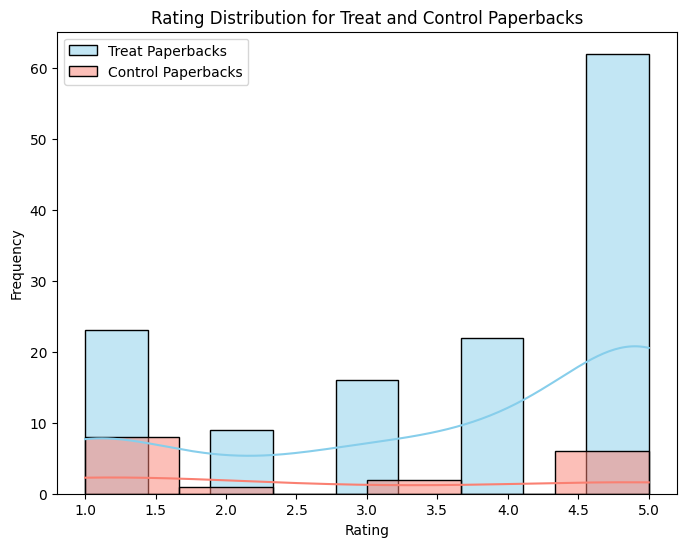

In [ ]:
# prompt: plot the ratings for treat paperbacks and control paperbacks

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_treat_paperbacks_df and combined_control_paperbacks_df are already defined as in your provided code

# Convert 'Rating' columns to numeric, handling potential errors
combined_treat_paperbacks_df['Rating'] = pd.to_numeric(combined_treat_paperbacks_df['Rating'], errors='coerce')
combined_control_paperbacks_df['Rating'] = pd.to_numeric(combined_control_paperbacks_df['Rating'], errors='coerce')

# Drop rows with non-numeric ratings
combined_treat_paperbacks_df.dropna(subset=['Rating'], inplace=True)
combined_control_paperbacks_df.dropna(subset=['Rating'], inplace=True)


# Create the plot
plt.figure(figsize=(8, 6))
sns.histplot(combined_treat_paperbacks_df['Rating'], kde=True, label='Treat Paperbacks', color='skyblue')
sns.histplot(combined_control_paperbacks_df['Rating'], kde=True, label='Control Paperbacks', color='salmon')
plt.title('Rating Distribution for Treat and Control Paperbacks')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Ratins based on frequency, however thi doesn't tell us everything because there is an inequivealnt amount of data.

with this being said paperbakc for the control group have a higher proportion of negative reviews

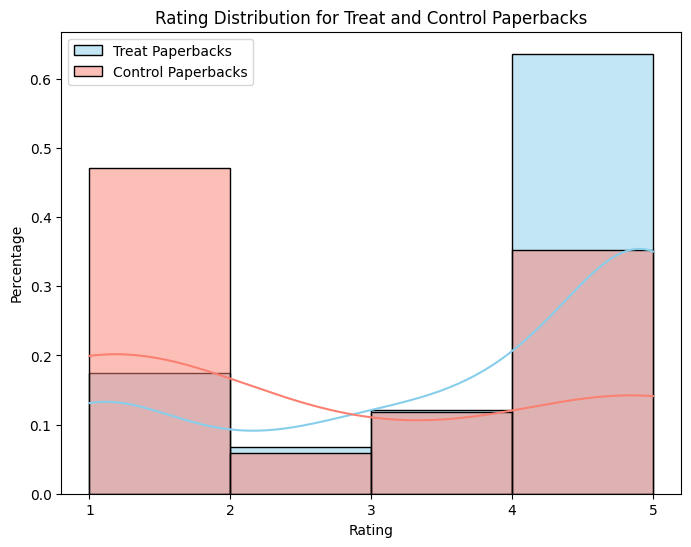

In [ ]:
# Convert 'Rating' columns to numeric, handling potential errors
combined_treat_paperbacks_df['Rating'] = pd.to_numeric(combined_treat_paperbacks_df['Rating'], errors='coerce')
combined_control_paperbacks_df['Rating'] = pd.to_numeric(combined_control_paperbacks_df['Rating'], errors='coerce')

# Drop rows with non-numeric ratings
combined_treat_paperbacks_df.dropna(subset=['Rating'], inplace=True)
combined_control_paperbacks_df.dropna(subset=['Rating'], inplace=True)

# Create the plot
plt.figure(figsize=(8, 6))

# Calculate the total number of ratings for each group
total_treat = len(combined_treat_paperbacks_df)
total_control = len(combined_control_paperbacks_df)

# Calculate the percentage for each bin
bins = [1, 2, 3, 4, 5]  # Bins for rating values 1 to 5

sns.histplot(combined_treat_paperbacks_df['Rating'], kde=True, label='Treat Paperbacks', color='skyblue',
             bins=bins, stat='probability')
sns.histplot(combined_control_paperbacks_df['Rating'], kde=True, label='Control Paperbacks', color='salmon',
             bins=bins, stat='probability')

plt.title('Rating Distribution for Treat and Control Paperbacks')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.legend()

# Set x-axis ticks to 1, 2, 3, 4, 5
plt.xticks(bins)

plt.show()


**For the treated books the percentage of higher ratings is a lot higher than the control**

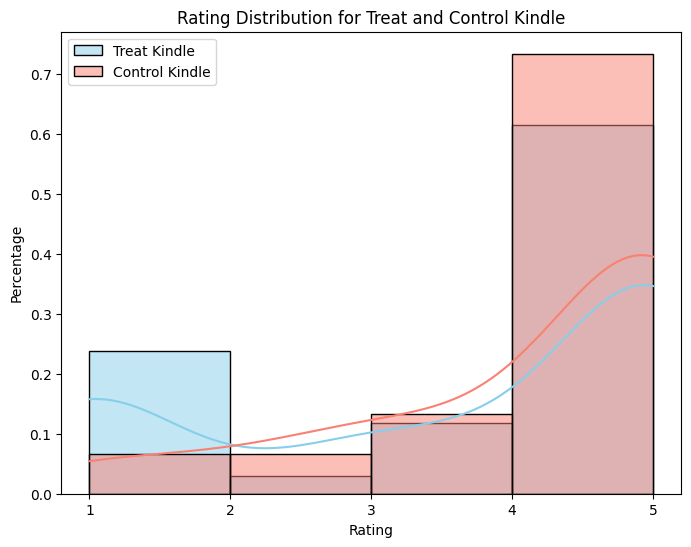

In [ ]:
# prompt: Create the rating distribution for treat and control digital

# Assuming combined_treat_kindle_df and combined_control_kindle_df are already defined as in your provided code

# Convert 'Rating' columns to numeric, handling potential errors
combined_treat_kindle_df['Rating'] = pd.to_numeric(combined_treat_kindle_df['Rating'], errors='coerce')
combined_control_kindle_df['Rating'] = pd.to_numeric(combined_control_kindle_df['Rating'], errors='coerce')

# Drop rows with non-numeric ratings
combined_treat_kindle_df.dropna(subset=['Rating'], inplace=True)
combined_control_kindle_df.dropna(subset=['Rating'], inplace=True)

# Create the plot
plt.figure(figsize=(8, 6))

# Calculate the total number of ratings for each group
total_treat = len(combined_treat_kindle_df)
total_control = len(combined_control_kindle_df)

# Calculate the percentage for each bin
bins = [1, 2, 3, 4, 5]  # Bins for rating values 1 to 5

sns.histplot(combined_treat_kindle_df['Rating'], kde=True, label='Treat Kindle', color='skyblue',
             bins=bins, stat='probability')
sns.histplot(combined_control_kindle_df['Rating'], kde=True, label='Control Kindle', color='salmon',
             bins=bins, stat='probability')

plt.title('Rating Distribution for Treat and Control Kindle')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.legend()

# Set x-axis ticks to 1, 2, 3, 4, 5
plt.xticks(bins)

plt.show()


**The control has a lot better ratings for digital/kindle than for treat**

# **Individual Books**

In [ ]:
import os
def import_csvs_to_dataframes(folder_path):
    """
    Imports all CSV files in the specified folder into a dictionary of DataFrames.

    Args:
        folder_path (str): The path to the folder containing CSV files.

    Returns:
        dict: A dictionary where keys are filenames (without '.csv') and values are pandas DataFrames.
    """
    dataframes = {}

    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            name = os.path.splitext(file)[0]
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            dataframes[name] = df
            print(f"Loaded: {file} → dataframe name: '{name}'")

    return dataframes


In [ ]:
folder_path = "."
imported_data = import_csvs_to_dataframes(folder_path)

Loaded: HouseHardcover.csv → dataframe name: 'HouseHardcover'
Loaded: MelaniaPrice.csv → dataframe name: 'MelaniaPrice'
Loaded: House2Star.csv → dataframe name: 'House2Star'
Loaded: AnxiousRecent.csv → dataframe name: 'AnxiousRecent'
Loaded: House5Star.csv → dataframe name: 'House5Star'
Loaded: Body1Star.csv → dataframe name: 'Body1Star'
Loaded: House4Star.csv → dataframe name: 'House4Star'
Loaded: MelaniaKindle.csv → dataframe name: 'MelaniaKindle'
Loaded: MelaniaRecent.csv → dataframe name: 'MelaniaRecent'
Loaded: HillbillyPrice.csv → dataframe name: 'HillbillyPrice'
Loaded: Hillbilly5Stars.csv → dataframe name: 'Hillbilly5Stars'
Loaded: HillbillyKindle.csv → dataframe name: 'HillbillyKindle'
Loaded: BodyDigital.csv → dataframe name: 'BodyDigital'
Loaded: Tyranny1Star.csv → dataframe name: 'Tyranny1Star'
Loaded: AnxiousHardcover.csv → dataframe name: 'AnxiousHardcover'
Loaded: MelaniaFourStars.csv → dataframe name: 'MelaniaFourStars'
Loaded: HouseKindle.csv → dataframe name: 'HouseKi

In [ ]:
# prompt: concat the Rating column for each file in imported_data so it doesn't say 'out of 5 stars'

for filename, df in imported_data.items():
    if 'Rating' in df.columns:
        df['Rating'] = df['Rating'].astype(str).str.replace(r' out of 5 stars', '', regex=True)


In [ ]:
imported_data['HouseHardcover']

,User Name,Review Date,Rating,Review Body
0,Kathryn O'Neill,"Reviewed in the United States on March 1, 2025",1.0,Deceiving description of book . Sold as hardco...


# **Control**

In [ ]:
def plot_rating_distribution_for_book(df, book_name):
    """Plots the rating distribution for a specific book as percentages."""
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Ensure ratings are numeric
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df.dropna(subset=['Rating'], inplace=True)

    # Plot
    plt.figure(figsize=(8, 6))
    rating_counts = df['Rating'].value_counts(normalize=True).sort_index() * 100
    sns.barplot(x=rating_counts.index, y=rating_counts.values, color='skyblue')
    plt.title(f'Rating Distribution for {book_name}')
    plt.xlabel('Rating')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    plt.show()


**Anxious Control**

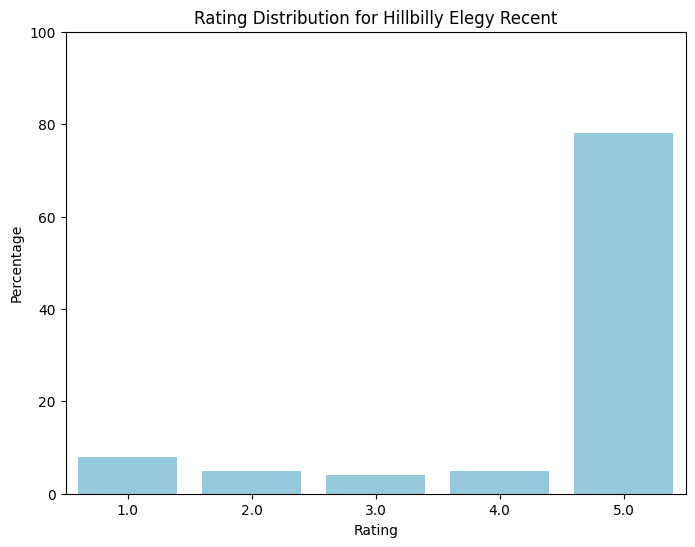

In [ ]:
plot_rating_distribution_for_book(imported_data['AnxiousRecent'], "Anxious Recent")

**Recent Sentiment for Anxious is largely positive**

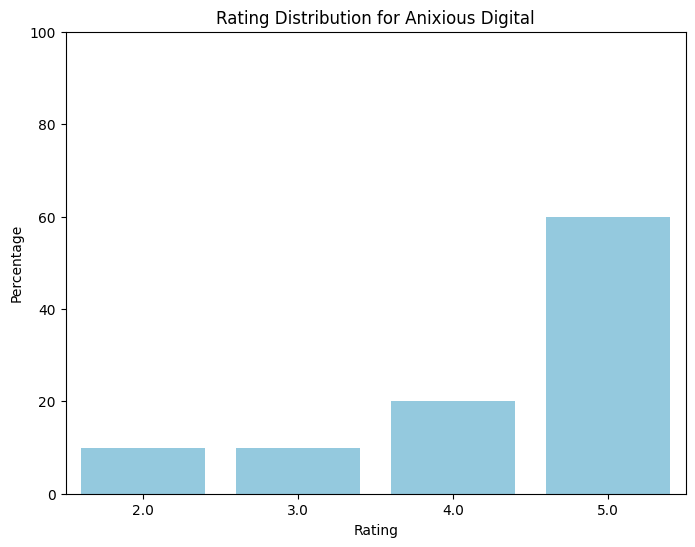

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['AnxiousDigital'],imported_data['AnxiousKindle']]),"Anixious Digital")

In [ ]:
imported_data['AnxiousDigital'].describe()

,Rating
count,18.000000
mean,4.388889
std,1.036901
min,2.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


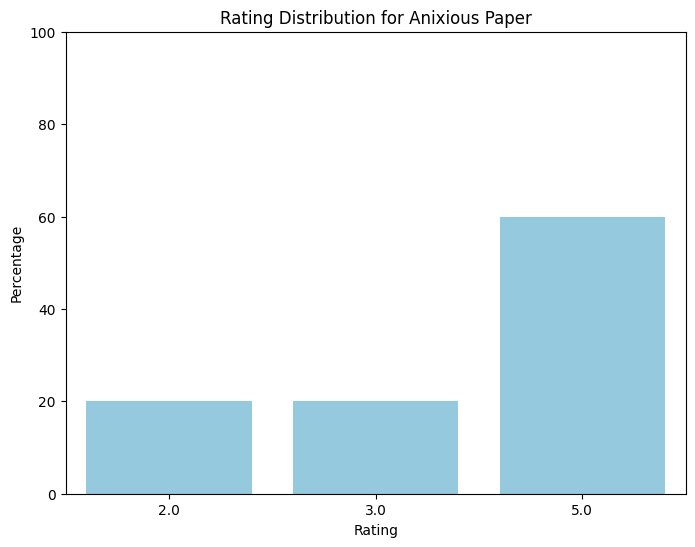

In [ ]:
plot_rating_distribution_for_book(imported_data['AnxiousPaper'], "Anixious Paper")

**House Control**

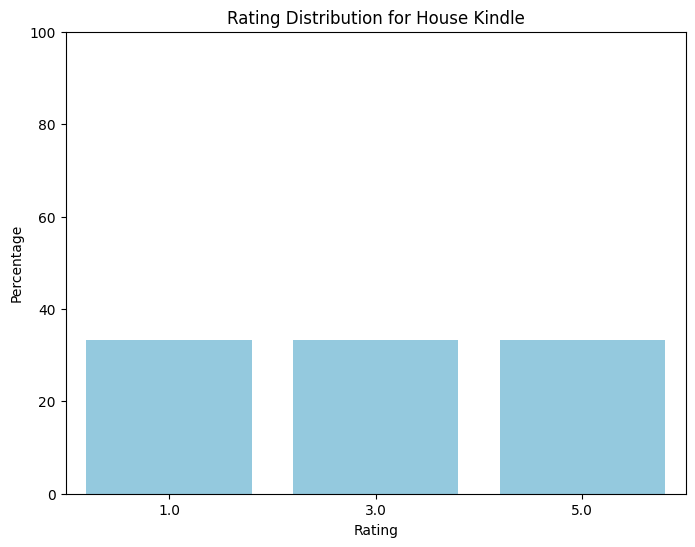

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['HouseKindle']]), "House Kindle")

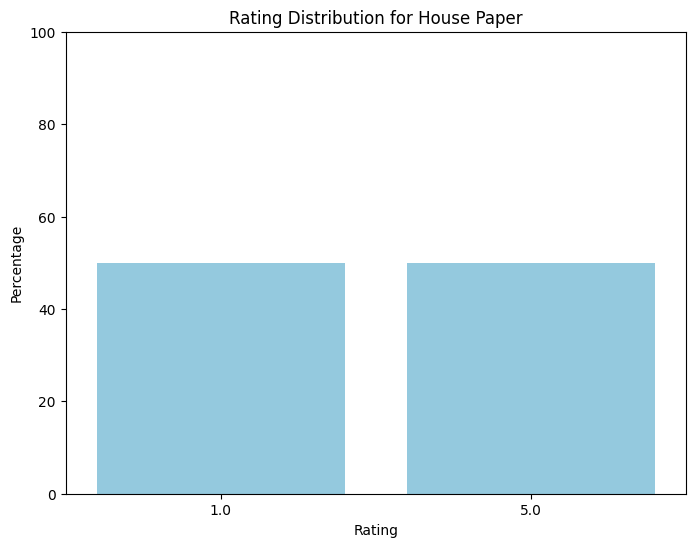

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['HousePaper'],imported_data['HousePaperback']]), "House Paper")

Doesnt tell us anything

**Melania Control**

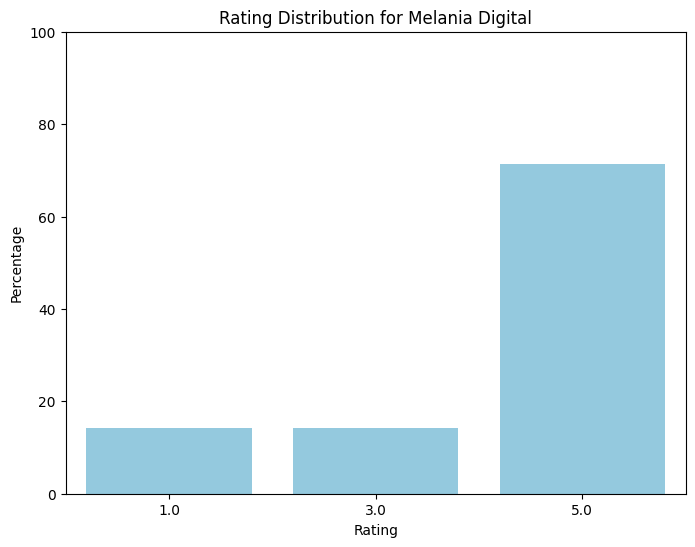

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['MelaniaDigital'],imported_data['MelaniaKindle']]), "Melania Digital")

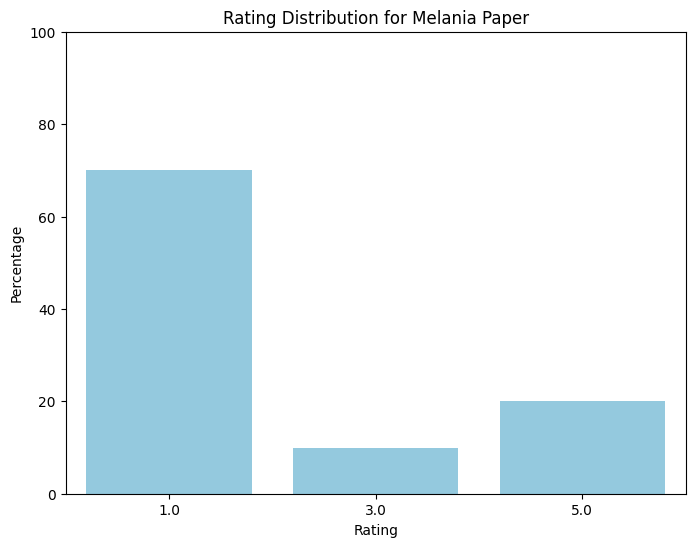

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['MelaniaPaper']]), "Melania Paper")

**Hillbilly Treat**

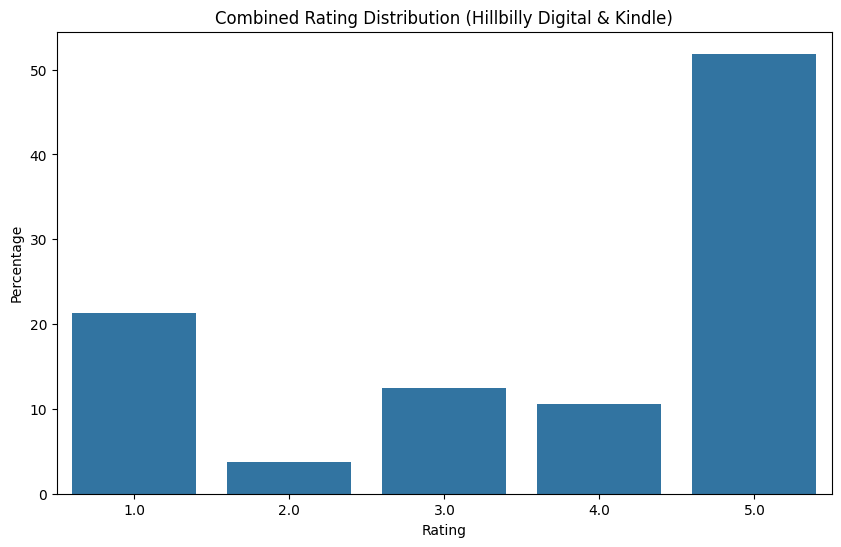

In [ ]:
# prompt: in imported data there are two datasets hillbillydigital and hillbilly Kindle could you plot them combined based on ratings and percentage

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your data into digital_df and kindle_df

# Combine the two DataFrames
combined_df = pd.concat([digital_df, kindle_df])

# Convert 'Rating' to numeric (if needed)
combined_df['Rating'] = pd.to_numeric(combined_df['Rating'], errors='coerce')

# Calculate rating percentages
rating_percentages = combined_df['Rating'].value_counts(normalize=True) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_percentages.index, y=rating_percentages.values)
plt.title('Combined Rating Distribution (Hillbilly Digital & Kindle)')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.show()


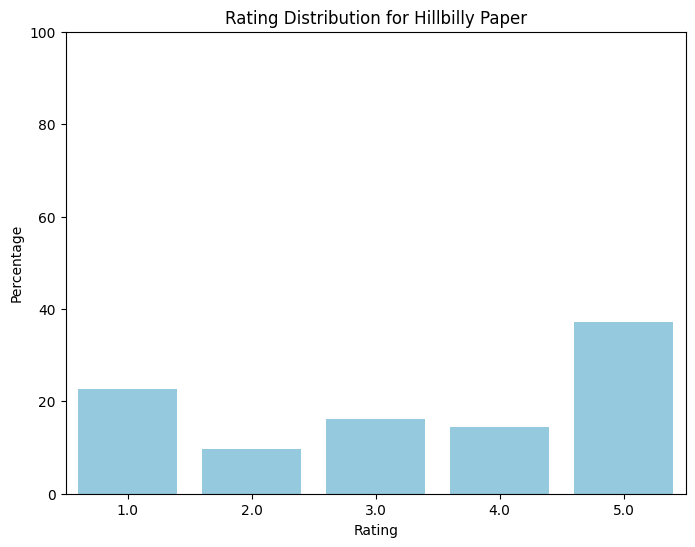

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['HillbillyPaper'],imported_data['HillbillyPaperback']]), "Hillbilly Paper")

**Tyranny Treat**

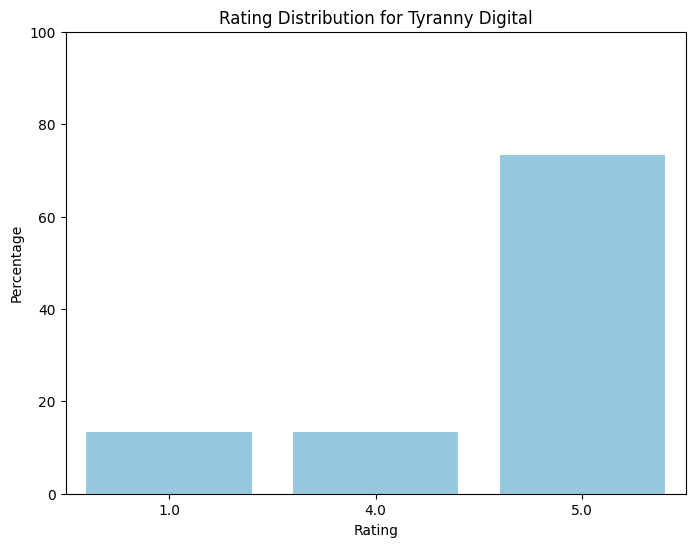

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['TyrannyDigital'],imported_data['TyrannyEbook'], imported_data['TyrannyKindle']]), "Tyranny Digital")

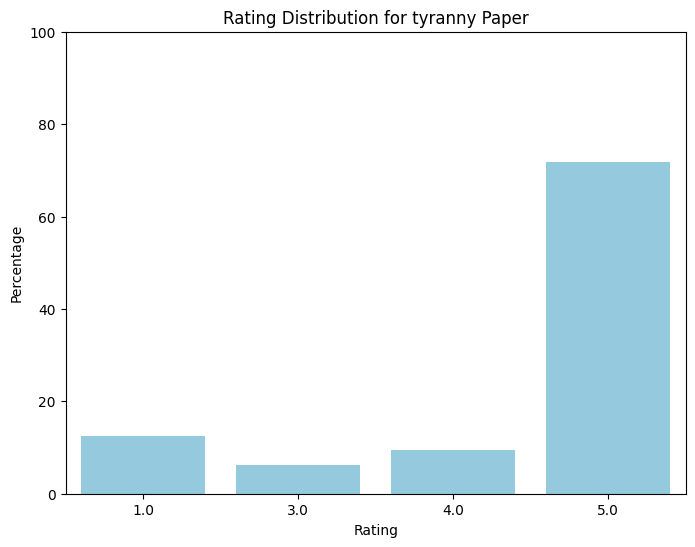

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['TyrannyPaper'],imported_data['TyrannyPaperback']]), "tyranny Paper")

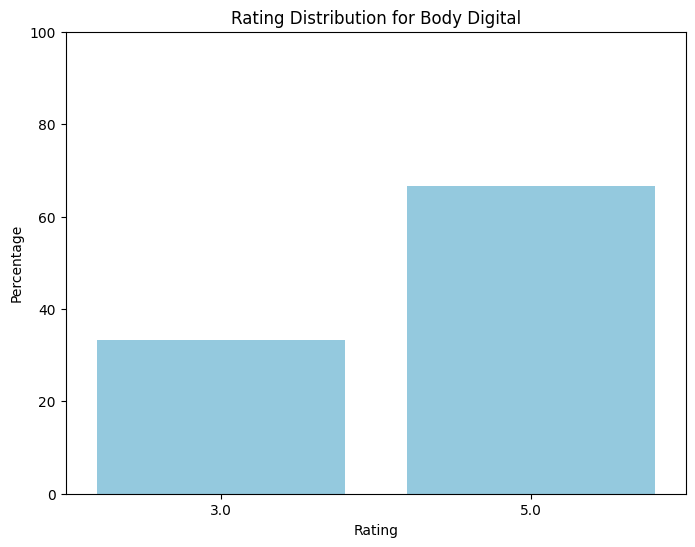

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['BodyDigital'],imported_data['BodyEbook']]), "Body Digital")

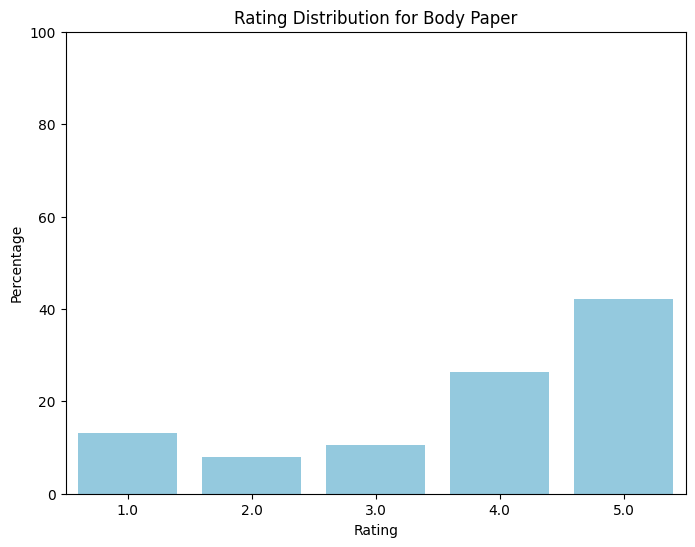

In [ ]:
plot_rating_distribution_for_book(pd.concat([imported_data['BodyPaper'],imported_data['BodyPaperback']]), "Body Paper")